In [13]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [14]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
gdf = pd.read_csv('regssdatacsv.csv')

In [16]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [17]:
OKCdf = gdf[gdf.Tm == 'OKC']
LALdf = gdf[gdf.Tm == 'LAL']


In [18]:
OKCdf.Date = OKCdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
OKCdf = OKCdf[(OKCdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (OKCdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

LALdf.Date = LALdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
LALdf = LALdf[(LALdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (LALdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

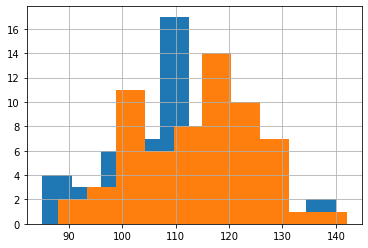

In [22]:
OKCdf.TeamPTS.hist()
LALdf.TeamPTS.hist()

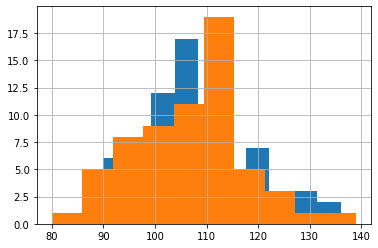

In [21]:
OKCdf.OpponentPTS.hist()
LALdf.OpponentPTS.hist()

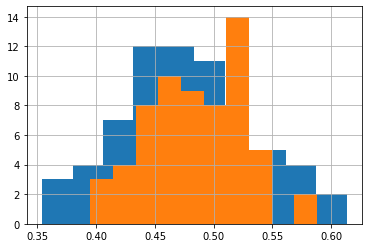

In [20]:
OKCdf.TeamFGP.hist()
LALdf.TeamFGP.hist()

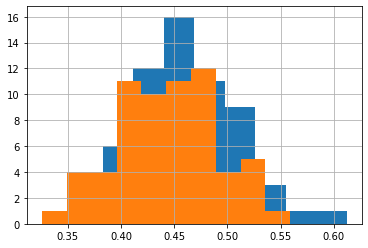

In [19]:
OKCdf.OpponentFGP.hist()
LALdf.OpponentFGP.hist()

In [23]:
OKCmeanpts = OKCdf.TeamPTS.mean()
LALmeanpts = LALdf.TeamPTS.mean()
OKCfgp = OKCdf.TeamFGP.mean()
LALfgp = LALdf.TeamFGP.mean()
OKCsdpts = OKCdf.TeamPTS.std()
LALsdpts = LALdf.TeamPTS.std()

OKCmeaLALp = OKCdf.OpponentPTS.mean()
LALmeaLALp = LALdf.OpponentPTS.mean()
OKCfgpopp = OKCdf.OpponentFGP.mean()
LALfgpopp = LALdf.OpponentFGP.mean()
OKCsdopp = OKCdf.OpponentPTS.std()
LALsdopp = LALdf.OpponentPTS.std()

print("OKC Mean ", OKCmeanpts)
print("OKC FG% ", OKCfgp)
print("OKC Points Standard Deviation ", OKCsdpts)
print("LAL Points Mean ", LALmeanpts)
print("LAL FG% ", LALfgp)
print("LAL Points Standard Deviation ", LALsdpts)

print("OKC OppPoints Mean ", OKCmeaLALp)
print("OKC OppFG% Mean ", OKCfgpopp)
print("OKC OppPoints SD ", OKCsdopp)
print("LAL OppPoints Mean ", LALmeaLALp)
print("LAL OppFG% Mean ", LALfgpopp)
print("LAL OppPoints SD ", LALsdopp)

OKC Mean  110.765625
OKC FG%  0.4743125
OKC Points Standard Deviation  11.978475652947415
LAL Points Mean  114.33333333333333
LAL FG%  0.4843333333333334
LAL Points Standard Deviation  11.528366137768684
OKC OppPoints Mean  108.3125
OKC OppFG% Mean  0.45717187500000017
OKC OppPoints SD  10.555785294074676
LAL OppPoints Mean  106.92063492063492
LAL OppFG% Mean  0.4444603174603174
LAL OppPoints SD  11.424791361547479


In [24]:
def gameSim():
    OKCScore = (rnd.gauss(OKCmeanpts,OKCsdpts)+ rnd.gauss(LALmeaLALp,LALsdopp))/2
    LALScore = (rnd.gauss(LALmeanpts,LALsdpts)+ rnd.gauss(LALmeaLALp,LALsdopp))/2
    if int(round(OKCScore)) > int(round(LALScore)):
        return 1
    elif int(round(OKCScore)) < int(round(LALScore)):
        return -1
    else: return 0

In [25]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('OKC Win ', team1win/(team1win+team2win),'%')
    print('LAL Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [26]:
gAmesSim(10000)

OKC Win  0.4290005178663905 %
LAL Win  0.5709994821336095 %


[1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 1,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -